In [5]:
from src.drp_fall_2025.fields import PrimeField
from src.drp_fall_2025.linear_algebra import VectorSpace
from src.drp_fall_2025.topology import SimplicialComplex
from src.drp_fall_2025.analysis import compute_betti_numbers

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Proof-of-concept for creating and working with a vector space on $Z/2Z$

In [2]:
Z2 = PrimeField(order=2)

V = VectorSpace(dimension=3, field=Z2)

v1 = V.vector(1, 0, 1)
v2 = V.vector(1, 1, 0)

print(f"Field: {V.field}")
print(f"v1: {v1}")
print(f"v2: {v2}")

# Expected: (1+1, 0+1, 1+1) mod 2 = (0, 1, 1)
v_sum = v1 + v2
print(f"v1 + v2 = {v_sum}")

# Expected: (1*1 + 0*1 + 1*0) mod 2 = (1 + 0 + 0) mod 2 = 1
dot_product = v1.dot(v2)
print(f"v1 . v2 = {dot_product}")

Field: PrimeField(order=2)
v1: Vector(1, 0, 1)
v2: Vector(1, 1, 0)
v1 + v2 = Vector(0, 1, 1)
v1 . v2 = 1


Compute the Betti numbers for a randomly generated complex. Generate 100 complexes from a list of 10 vertices and record each set of Betti Numbers. Find the average for each k-th Betti number from part c and plot the results in histograms. Discuss your findings.

In [7]:
NUM_VERTICES  = 10
NUM_RUNS = 100
P_DICT = {
    1: 0.4, # Probability of adding a 1-simplex (edge)
    2: 0.1, # Probability of adding a 2-simplex (triangle)
    3: 0.01 # Probability of adding a 3-simplex (tetrahedron)
}

print(f"We will run this simulation with {NUM_RUNS} runs on {NUM_VERTICES} vertices.")
print(f"Probabilities: {P_DICT}")

results = []

We will run this simulation with 100 runs on 10 vertices.
Probabilities: {1: 0.4, 2: 0.1, 3: 0.01}


In [8]:
for i in range(NUM_RUNS):
    if (i + 1) % 10 == 0:
        print(f"    Run {i+1}/{NUM_RUNS}...")

    complex_k = SimplicialComplex.from_bottom_up_process(NUM_VERTICES, P_DICT)

    betti = compute_betti_numbers(complex_k)
    results.append(betti)

    Run 10/100...
    Run 20/100...
    Run 30/100...
    Run 40/100...
    Run 50/100...
    Run 60/100...
    Run 70/100...
    Run 80/100...
    Run 90/100...
    Run 100/100...


In [9]:
df = pd.DataFrame(results).fillna(0)
df = df.astype(int)

print("\n--- Results ---")
print("Average Betti Numbers:")
print(df.mean())


--- Results ---
Average Betti Numbers:
0    1.10
1    8.32
2    0.00
dtype: float64


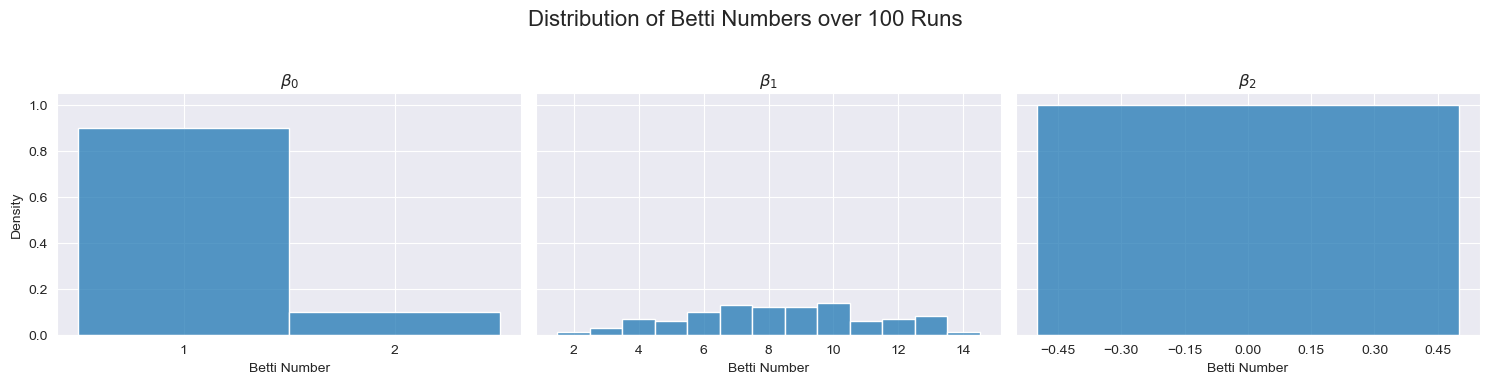

In [10]:
sorted_cols = sorted(df.columns)
num_betti = len(sorted_cols)

fig, axes = plt.subplots(
    1,
    num_betti,
    figsize=(5 * num_betti, 4),
    sharey=True,
    squeeze=False
)

axes = axes[0]

fig.suptitle(f'Distribution of Betti Numbers over {NUM_RUNS} Runs', fontsize=16)

for i, col in enumerate(sorted_cols):
    ax = axes[i]
    sns.histplot(data=df, x=col, ax=ax, discrete=True, stat="density")
    ax.set_title(f'$\\beta_{{{col}}}$')
    ax.set_xlabel('Betti Number')
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

if num_betti > 0:
    axes[0].set_ylabel('Density')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [11]:
print("\n--- Discussion Points ---")
print(f"β₀: Represents the number of connected components. The average is {df[0].mean():.2f}.")
print("    Why is the distribution shaped the way it is? With the given probabilities, are complexes likely to be connected or fragmented?")
print(f"β₁: Represents the number of loops or holes. The average is {df.get(1, pd.Series([0])).mean():.2f}.")
print("    How often do loops form? Does the probability of adding 1-simplices (edges) and 2-simplices (triangles) make loop formation common or rare?")
print("    If p for 1-simplices is high and p for 2-simplices is low, you might expect many loops.")
if 2 in df.columns:
    print(f"β₂: Represents voids. The average is {df.get(2, pd.Series([0])).mean():.2f}.")
    print("    Voids are much harder to form. What does the distribution tell you about the complexity of the generated structures?")


--- Discussion Points ---
β₀: Represents the number of connected components. The average is 1.10.
    Why is the distribution shaped the way it is? With the given probabilities, are complexes likely to be connected or fragmented?
β₁: Represents the number of loops or holes. The average is 8.32.
    How often do loops form? Does the probability of adding 1-simplices (edges) and 2-simplices (triangles) make loop formation common or rare?
    If p for 1-simplices is high and p for 2-simplices is low, you might expect many loops.
β₂: Represents voids. The average is 0.00.
    Voids are much harder to form. What does the distribution tell you about the complexity of the generated structures?
